In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time

In [2]:
with open("./kddcup.names.txt", 'r') as f: 
    lines = f.readlines()

columns = [line.split(':')[0].strip() for line in lines]
columns.append('target')
print(columns)
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
42


In [3]:
attacks_types = {'normal': 'normal'}
with open("./training_attack_types.txt", 'r') as f:
    line = f.readlines()

for l in line:
    str = l.split(' ')
    ind = str[0]
    val = str[1][:-1]
    attacks_types[ind] = val

print(attacks_types)
print(len(attacks_types))

{'normal': 'normal', 'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l'}
23


In [4]:
path = "./kddcup.data_10_percent_corrected"
df = pd.read_csv(path, names = columns) 
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]]) 
df.head() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [5]:
df.shape 

(494021, 43)

In [6]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
num_cols = df._get_numeric_data().columns 
  
cate_cols = list(set(df.columns)-set(num_cols)) 
cate_cols.remove('target') 
cate_cols.remove('Attack Type') 
  
cate_cols 

['flag', 'protocol_type', 'service']

(array([190065.,      0.,      0.,      0.,      0.,  20354.,      0.,
             0.,      0., 283602.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

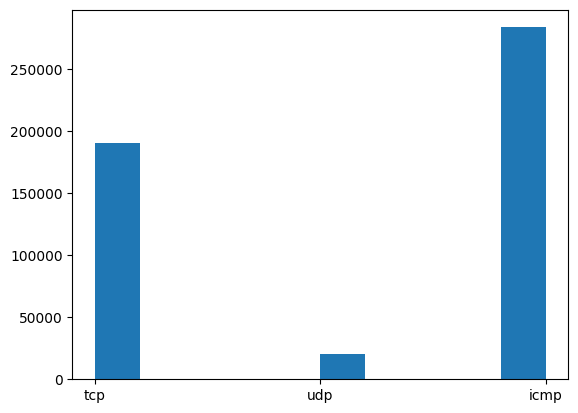

In [8]:
plt.hist(df['protocol_type'])

(array([420784.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  73237.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

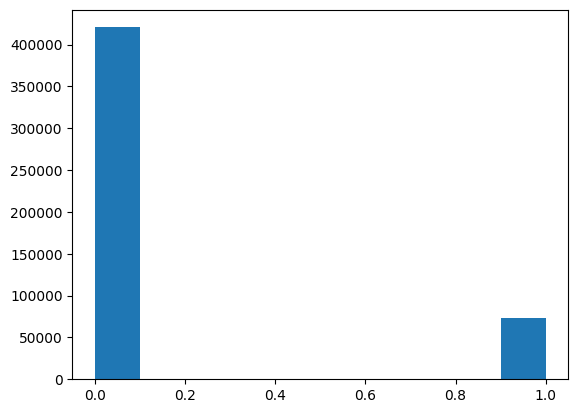

In [9]:
plt.hist(df['logged_in'])

(array([9.72780e+04, 0.00000e+00, 5.20000e+01, 0.00000e+00, 0.00000e+00,
        3.91458e+05, 0.00000e+00, 1.12600e+03, 0.00000e+00, 4.10700e+03]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

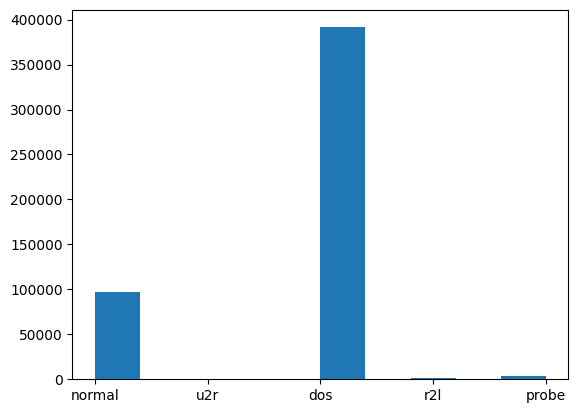

In [10]:
plt.hist(df['Attack Type'])

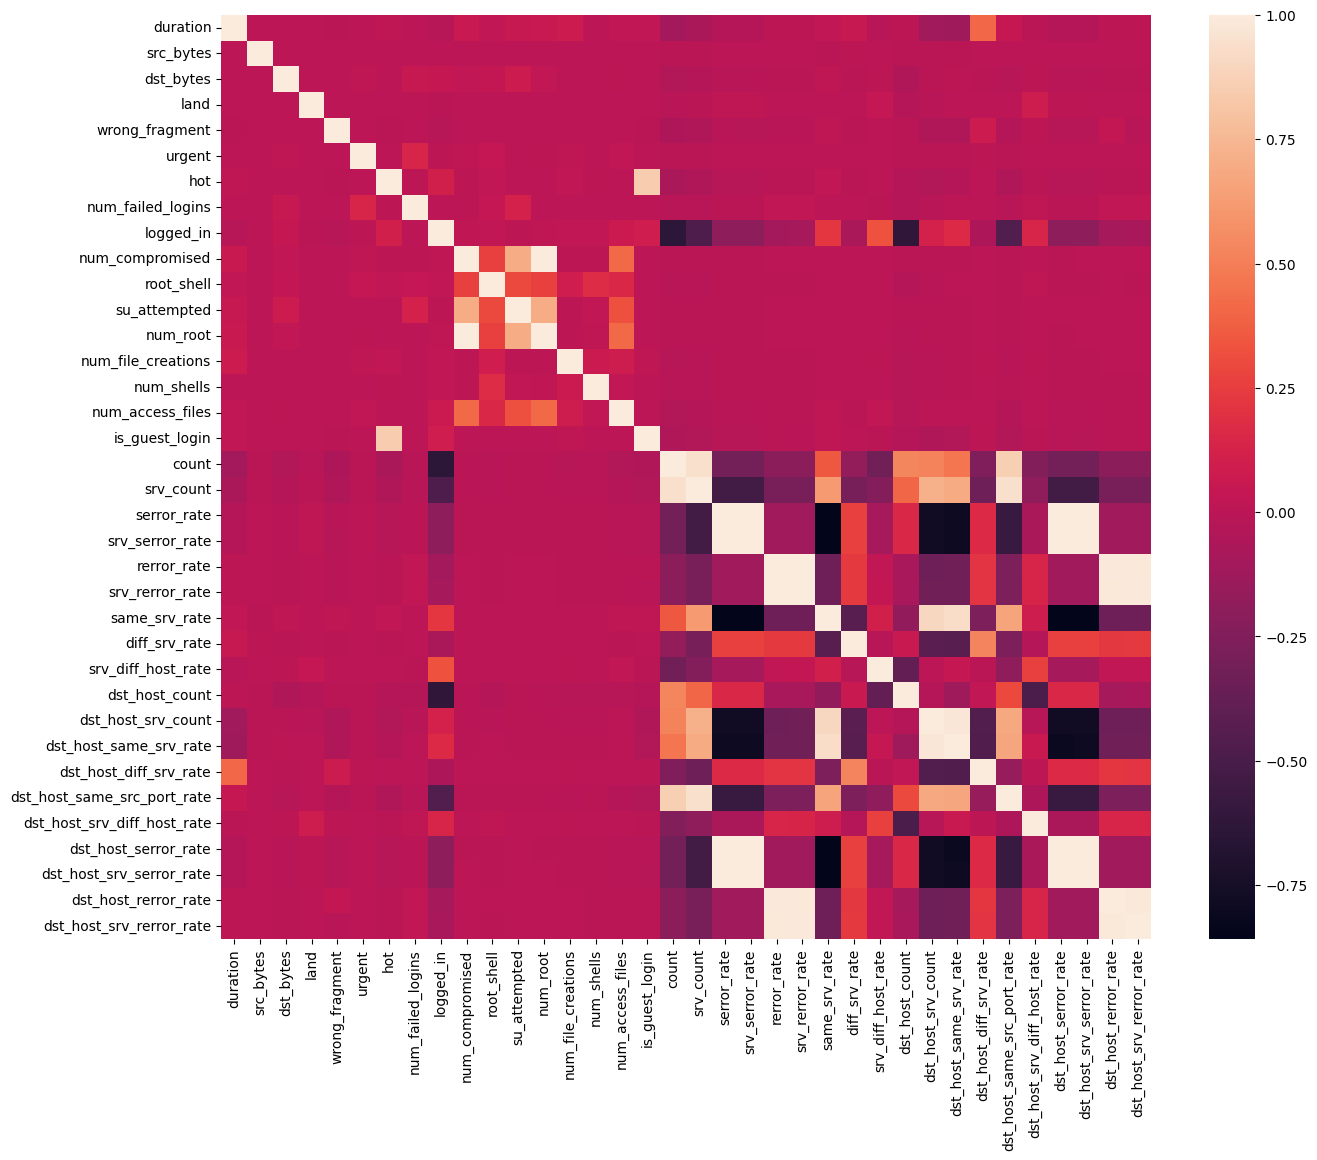

In [11]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df[[col for col in numeric_df if numeric_df[col].nunique() > 1]]# keep columns where there are more than 1 unique values 
corr = numeric_df.corr() 

plt.figure(figsize =(15, 12))
sns.heatmap(corr)
plt.show()

In [12]:
# This variable is highly correlated with num_compromised and should be ignored for analysis. 
df.drop('num_root', axis = 1, inplace = True) 

# This variable is highly correlated with serror_rate and should be ignored for analysis. 
df.drop('srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
df.drop('srv_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis. 
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
df.drop('dst_host_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
df.drop('dst_host_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.  
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True) 

In [13]:
# protocol_type feature mapping 
pmap = {'icmp':0, 'tcp':1, 'udp':2} 
df['protocol_type'] = df['protocol_type'].map(pmap) 

# flag feature mapping 
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10} 
df['flag'] = df['flag'].map(fmap) 

In [14]:
df.drop('service', axis = 1, inplace = True)

In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 

In [16]:
df = df.drop(['target', ], axis = 1) 
print(df.shape) 

y = df[['Attack Type']] 
X = df.drop(['Attack Type', ], axis = 1) 
  
sc = MinMaxScaler() 
X = sc.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape) 

(494021, 33)
(330994, 32) (163027, 32)
(330994, 1) (163027, 1)


In [17]:
# Import necessary libraries and modules
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Dictionary of models and their hyperparameters
models = {
    'SVC': (SVC(), {'gamma': ['scale']}),
    'GNB': (GaussianNB(), {'var_smoothing': [1e-09, 1e-08, 1e-07]}),
    'DTC': (DecisionTreeClassifier(), {'criterion': ['entropy', 'log_loss'], 'max_depth': [2, 4, 6]}),
    'RF': (RandomForestClassifier(), {'n_estimators': [10, 100, 1000]}),
    'LR': (LogisticRegression(), {'max_iter': [1000000, 1200000, 1400000]}),
    'GBC': (GradientBoostingClassifier(), {'random_state': [0, 1]}),
}

# Function to run grid search and evaluate the model
# List to store the predictions of each model
time_train = []
time_test = []
train_acc = []
test_acc = []

def evaluate_model(name, model, parameters):
    clf = GridSearchCV(model, parameters, cv=5)

    start_time = time.time() 
    clf.fit(X_train, y_train.values.ravel())
    end_time = time.time()
    time_train.append(end_time-start_time) 
    
    print(f"Best parameters for {name}: {clf.best_params_}")
    print(f"Best cross-validation score for {name}: {clf.best_score_:.6f}")
    print(f"The training time for {name}: {time_train[-1]}")
    # Get the best model and best hyperparameters
    best_model = clf.best_estimator_
    best_params = clf.best_params_

    test_score = best_model.score(X_test, y_test)
    train_score = best_model.score(X_train, y_train)
    
    print(f"Train score for {name}: {train_score:.6f}")
    print(f"Test score for {name}: {test_score:.6f}")
    train_acc.append(train_score)
    test_acc.append(test_score)
    
    y_pred_model = best_model.predict(X_test)
    start_time = time.time() 
    y_train_pred = best_model.predict(X_train)
    end_time = time.time()
    time_test.append(end_time-start_time)
    print(f"The testing time for {name}: {time_test[-1]}")
    print("-------------------------------------------------------------------------------------------------------")

In [18]:
# Apply grid search and evaluation for each model
for name, (model, params) in models.items():
    evaluate_model(name, model, params)

Best parameters for SVC: {'gamma': 'scale'}
Best cross-validation score for SVC: 0.998622
The training time for SVC: 1176.7505612373352
Train score for SVC: 0.998746
Test score for SVC: 0.998785
The testing time for SVC: 122.05095481872559
-------------------------------------------------------------------------------------------------------
Best parameters for GNB: {'var_smoothing': 1e-07}
Best cross-validation score for GNB: 0.883221
The training time for GNB: 10.346510410308838
Train score for GNB: 0.884663
Test score for GNB: 0.884350
The testing time for GNB: 0.5825281143188477
-------------------------------------------------------------------------------------------------------
Best parameters for DTC: {'criterion': 'log_loss', 'max_depth': 6}
Best cross-validation score for DTC: 0.996100
The training time for DTC: 27.0447838306427
Train score for DTC: 0.995988
Test score for DTC: 0.995761
The testing time for DTC: 0.03270316123962402
--------------------------------------------

In [19]:
model = ['SVC', 'GNB', 'DTC', 'RF', 'LR', 'GBC']

Text(0.5, 1.0, 'Model Training time')

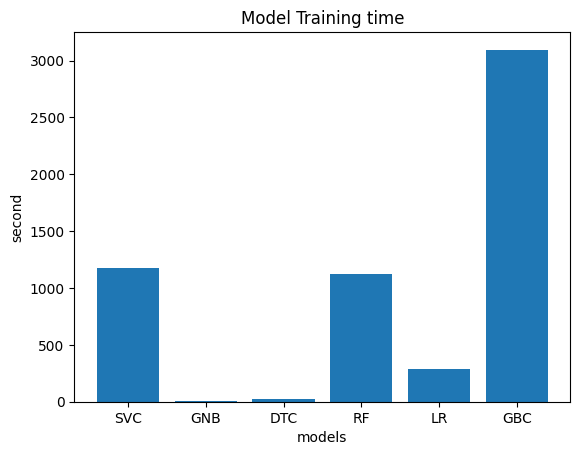

In [33]:
plt.bar(model, time_train)
plt.ylabel('second')
plt.xlabel('models')
plt.title('Model Training time')

Text(0.5, 1.0, 'Model Testing time')

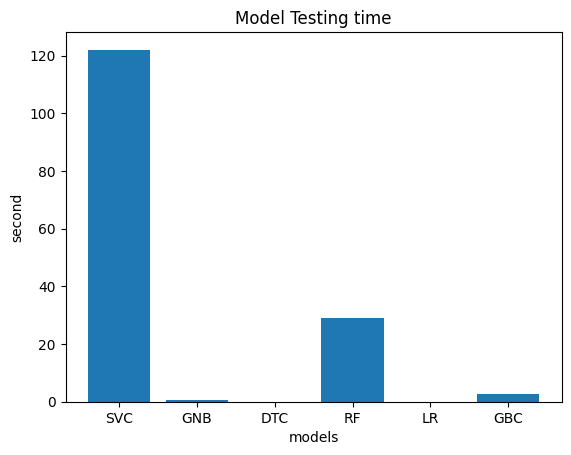

In [34]:
plt.bar(model, time_test)
plt.ylabel('second')
plt.xlabel('models')
plt.title('Model Testing time')

Text(0.5, 1.0, 'Model Training accuracy')

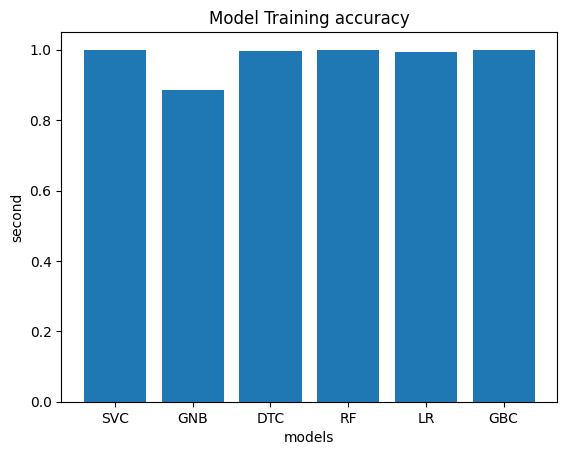

In [35]:
plt.bar(model, train_acc)
plt.ylabel('second')
plt.xlabel('models')
plt.title('Model Training accuracy')

Text(0.5, 1.0, 'Model Testing accuracy')

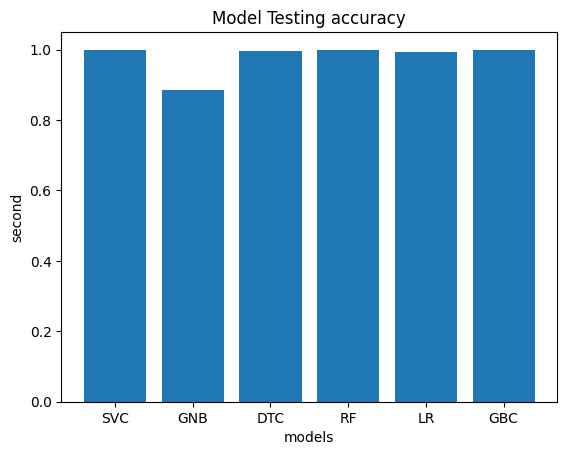

In [36]:
plt.bar(model, test_acc)
plt.ylabel('second')
plt.xlabel('models')
plt.title('Model Testing accuracy')